### **1. Loading and Preprocessing**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [3]:
#load Iris_Dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
import seaborn as sns
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
data.info()  # Get dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
print(data.isnull().sum()) # Check for missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


✅ No null values in the dataset

In [7]:
data.duplicated().sum() # Check for duplicate values

1

In [8]:
data.drop_duplicates(inplace=True) # Remove duplicate values

In [9]:
data.duplicated().sum()

0

In [10]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[149 rows x 5 columns]


In [11]:
#dropping the species column since this is a clustering problem.
data = data.drop(columns=['species'])

In [12]:
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### ✅ Now, the dataset contains only numerical features

In [13]:
scaler = StandardScaler()
x_Scaled = scaler.fit_transform(data)
x_Scaled

array([[-0.8980334 ,  1.01240113, -1.33325507, -1.30862368],
       [-1.13956224, -0.1373532 , -1.33325507, -1.30862368],
       [-1.38109108,  0.32254853, -1.39001364, -1.30862368],
       [-1.5018555 ,  0.09259766, -1.2764965 , -1.30862368],
       [-1.01879782,  1.242352  , -1.33325507, -1.30862368],
       [-0.53574014,  1.9322046 , -1.16297935, -1.04548613],
       [-1.5018555 ,  0.78245027, -1.33325507, -1.17705491],
       [-1.01879782,  0.78245027, -1.2764965 , -1.30862368],
       [-1.74338434, -0.36730407, -1.33325507, -1.30862368],
       [-1.13956224,  0.09259766, -1.2764965 , -1.44019246],
       [-0.53574014,  1.47230287, -1.2764965 , -1.30862368],
       [-1.26032666,  0.78245027, -1.21973792, -1.30862368],
       [-1.26032666, -0.1373532 , -1.33325507, -1.44019246],
       [-1.86414876, -0.1373532 , -1.50353079, -1.44019246],
       [-0.05268246,  2.16215547, -1.44677222, -1.30862368],
       [-0.17344688,  3.08195894, -1.2764965 , -1.04548613],
       [-0.53574014,  1.

In [14]:
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


##  2.Clustering Algorithm Implementation

### **A) K Means Clustering**

#### * **Provide a brief description of how KMeans clustering works.**




#### K-Means is an unsupervised machine learning algorithm used for clustering data into K distinct groups based on feature similarity.It groups together similar data points into clusters by minimizing the distance between data points in a cluster with their centroid or k mean value.
##### How it works:-
      1.Choose K (number of clusters).
      2.Randomly initialize K centroids (starting points for each cluster).
      3.Assign each data point to the nearest centroid (using Euclidean distance).
      4.Recalculate the centroids by taking the mean of all points in each cluster.
      5.Repeat steps 3 & 4 until centroids no longer change (convergence).

### * **Explain why KMeans clustering might be suitable for the Iris dataset.**



#### K-Means clustering is well-suited for the Iris dataset because the dataset consists of numerical features that exhibit clear separability among different species of Iris flowers.K-Means works well for datasets with well-separated clusters and when the number of clusters is known or can be estimated. The Iris dataset is relatively small, making it efficient for K-Means to process and find meaningful patterns.



####*   **Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters**



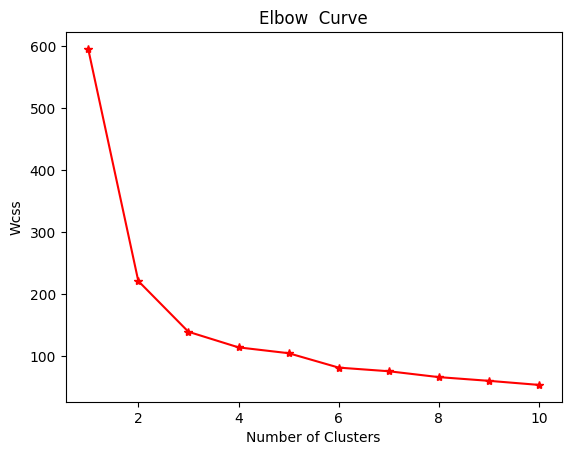

In [18]:
# Elbow method to find optimal number of clusters
Wcss=[]
k_values=range(1,11)
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(x_Scaled)
  Wcss.append(kmeans.inertia_)
  #plotting elbow curve
import matplotlib.pyplot as plt
plt.plot(k_values,Wcss,marker="*",color ='red')
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")
plt.title("Elbow  Curve")
plt.show()


##### 👉The Elbow Method involves plotting the WCSS against the number of clusters. The point on the plot where the WCSS starts to decrease less rapidly (resembling an elbow) is often considered the optimal number of clusters. This point suggests a good balance between minimizing WCSS and avoiding overfitting the data with too many clusters.
##### 👉From this generated elbow curve,the "elbow" appears to be around k=3. This suggests that 3 clusters might be a good choice for your dataset

In [20]:
#k-mean
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=15)
data['Cluster']=kmeans.fit_predict(x_Scaled)
data

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


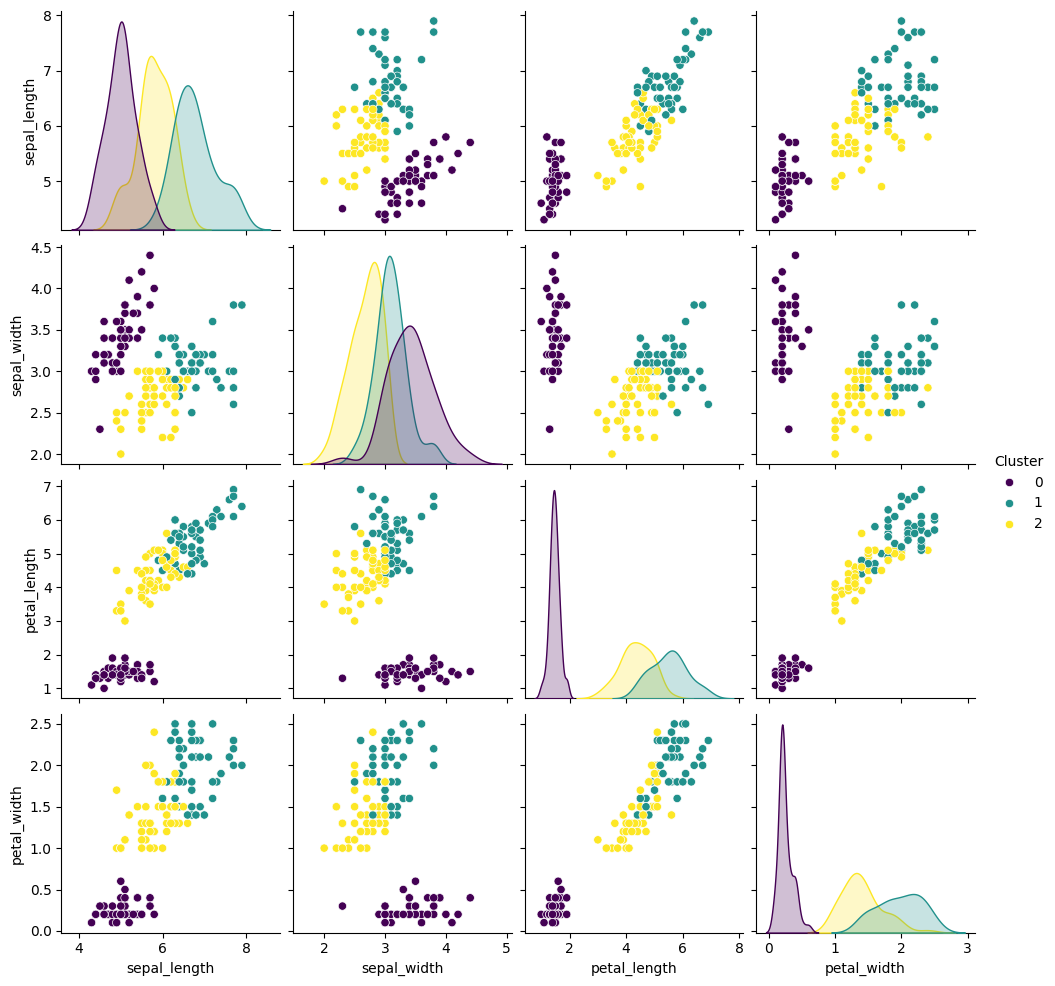

In [21]:
# Visualize the clusters using seaborn
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.show()

In [23]:
#Silhoutte score
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(x_Scaled,data['Cluster'])
print("Silhouette Score : ",silhouette_avg)

Silhouette Score :  0.46068122144785184


In [24]:
#Creating profile
cluster_profile=data.groupby("Cluster").mean()
cluster_profile

,sepal_length,sepal_width,petal_length,petal_width
Cluster,,,,
0,5.006000,3.428000,1.462000,0.246000
1,6.780851,3.095745,5.510638,1.972340
2,5.801923,2.673077,4.355769,1.403846


### B) Hierarchical Clustering

#### **Provide a brief description of how Hierarchical clustering works.**

##### Hierarchical clustering is an unsupervised machine learning algorithm used to build a hierarchy of clusters.
##### How it works :-
Agglomerative Approach (Bottom-Up):

      1.Initially, each data point is treated as its own cluster.
      2.In each step, the two closest clusters are merged together based on a distance metric (e.g., Euclidean distance).
      3.This process continues until all data points are merged into a single cluster, resulting in a tree-like structure.
Divisive Approach (Top-Down):

      1.Initially, all data points are in one cluster.
      2.The data is recursively split into smaller clusters until each data point forms its own cluster.

#### **Explain why Hierarchical clustering might be suitable for the Iris dataset.**

#### Hierarchical clustering is suitable for the Iris dataset because it offers several advantages that align with the dataset's characteristics. Iris dataset's characteristics—distinct groups, numerical features, and a relatively compact size—align well with the assumptions and workings of the hierarchical clustering algorithm, making it a suitable technique for exploring the structure of this dataset.

#### **Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.**

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,linkage='ward')
data['Cluster']=hc.fit_predict(x_Scaled)
data

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


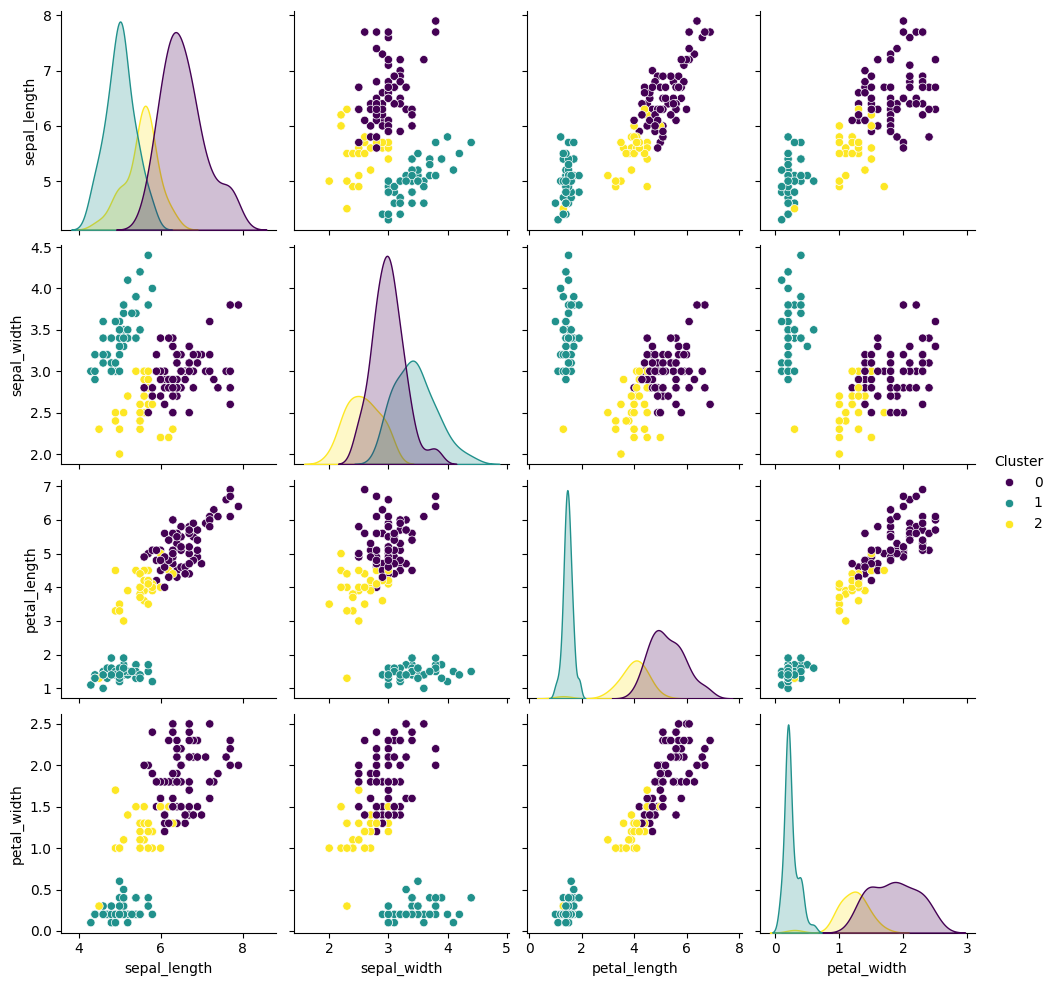

In [27]:
# Visualize the clusters using seaborn
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.show()

In [29]:
#Silhoutte score
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(x_Scaled,data['Cluster'])
print("Silhouette Score : ",silhouette_avg)

Silhouette Score :  0.449816434773055


In [30]:
#Creating profile
cluster_profile=data.groupby("Cluster").mean()
cluster_profile

,sepal_length,sepal_width,petal_length,petal_width
Cluster,,,,
0,6.557143,2.997143,5.270000,1.854286
1,5.016327,3.451020,1.465306,0.244898
2,5.530000,2.566667,3.930000,1.206667


### 👉Both K-Means and Hierarchical clustering are effective unsupervised learning techniques for the Iris dataset, each offering unique advantages.Both algorithms can provide valuable insights into the structure of the Iris dataset, with the choice between them depending on the specific goals and computational constraints.